# Support Vector Regression

## data prep

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [5]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [8]:
y = y.reshape(len(y),1)

we need to change the y into 2d array because StandardScaler expect 2d array as a input

In [10]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

## feature scaling 

In [12]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [13]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [14]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## training the SVR model 

In [16]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

SVR()

## predicting new result 

In [30]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## visualising the SVR result 

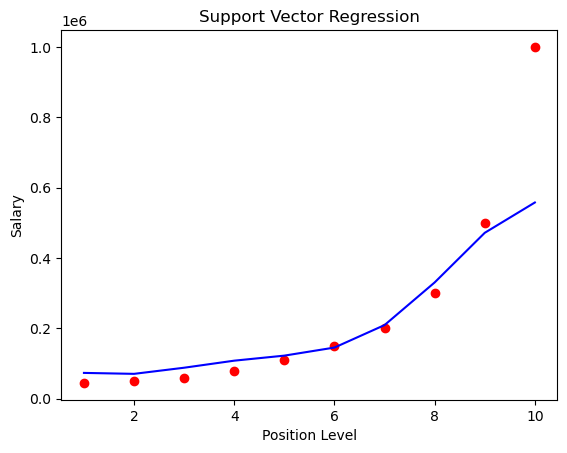

In [44]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color = 'blue')
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

---

## personal notes :

### q1 : why we need to apply feature scaling when we use SVR model ?
iy is because if we have different scales , the feature with a larger range will dominate this distance calculations , leading to a biased model

### q2 : what is kernel ?
in case we use svr model , kernel is a mathematical function used to transform data into a higher-dimensional space , where the data can be more easily separated or fitted with a linear function . there are several kernel functions :
* linear kernel : used if the data can be separated linearly
* polynomial kernel : builds non linear relationship in the form of polynomials
* Radial Basis Function kernel : highly effective inhandling complex non linear relationship
* sigmoid kernel : used a sigmoid function as the mapping , often used in neural network